In [1]:
# This imports the needed modules
import random
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Define the individual class
class Individual:
    """Class to hold all of the indeviduals in a population"""    
    def __init__(indev,color):
        """This function denotes an indevidual class with a specific phenotype."""
        indev.color=color
    
#List containing phenotypes
phenoList=["brown","black"] 

In [3]:
# Define the Population Class
class Population:
    def __init__(indev,colorPop,sizePop):
        """Constructor for the Population Class"""
        
        indev.colorPop = colorPop
        indev.sizePop = sizePop
        #Creates a list for indeviduals
        indev.listPop = [] 
        
        #This adds 500 (sizePop) indeviduals (ind) to indev.listPop 
        for ind in range(sizePop): 
            indev.listPop.append(Individual(color=colorPop))
    
    def countPheno(indev):
        """This function counts the number of phenotypes in indev.listPop"""
        
        brown = 0
        black = 0
        #loops through indeviduals in indev.listPop and counts the number of each phenotype
        for ind in indev.listPop:
            if ind.color == "brown":
                brown += 1
            elif ind.color == "black":
                black += 1
            else:
                print("Something is wrong! Phenotype is not brown or black!")
        #List stores number of each phenotype
        phenoNum = [brown,black]
        return phenoNum
    
        
    def printFrequency(indev):
        """This function determines the number of indeviduals present in each population."""
        return(len(indev.listPop))
        

In [4]:
 # This is a dispersal matrix for np.random.choice to move each indevidual    
moves=[['AA', 'AB'], ['BB', 'BA']]

In [5]:
# Define the landscape class
class Landscape:
    def __init__(indev,popID,sizePopNew,migration):
        """Constructor for the Landscape class"""
        
        indev.popID = popID
        #This retrieves data from the Population Class
        indev.landPop = Population(colorPop = phenoList.pop(), sizePop= sizePopNew)
        indev.migration = migration
    

    def move(indev): 
        """This function moves each indevidual from either A to B, B to A, leaves it within its original population."""
        
        #if indevidual is in population A
        if indev.popID == 'A': 
            #randomly select whether to move or stay
            randomMove = np.random.choice(moves[0], p = indev.migration)
            #stay
            if randomMove == 'AA':
                pass
            #move
            elif randomMove == 'AB': 
                random.shuffle(indev.landPop.listPop)
                B.landPop.listPop.append(indev.landPop.listPop.pop())
            else:
                print("Something is wrong!")

        #if indevidual is in population B
        elif indev.popID == 'B':
             #randomly select whether to move or stay
            randomMove = np.random.choice(moves[1], p = indev.migration) 
            #stay
            if randomMove == 'BB':
                pass
            #move
            elif randomMove == 'BA':
                random.shuffle(indev.landPop.listPop)
                A.landPop.listPop.append(indev.landPop.listPop.pop())
            else:
                print("Something is wrong!")
                
        
        
        

In [6]:
def draw(weeks):
    '''Draw plots for the trend of phenotype distribution in each population over time '''
    '''Draw plots for population in population A and population B over time '''
    # This creates a list for each phenotype within each population
    Abrown = []
    Ablack = []
    Bbrown = []
    Bblack = []
    # This creates a list for the number of indeviduals in each population
    Apop = []
    Bpop = []
    #This loop will simulate the movement of indeviduals in a specific number of weeks
    for w in range(weeks):  
        for ind in landPop:
            ind.move()
        popA = A.landPop.countPheno(); Abrown.append(popA[0]); Ablack.append(popA[1])
        popB = B.landPop.countPheno(); Bbrown.append(popB[0]); Bblack.append(popB[1])
        #This will calculate the new number in each population and append the lists
        Apop.append(A.landPop.printFrequency()) 
        Bpop.append(B.landPop.printFrequency())
    fig, (APlot, BPlot,) = plt.subplots(1,2,figsize=(15, 5))
    
    APlot.plot(range(weeks), Abrown, color = 'brown')
    APlot.plot(range(weeks), Ablack, color = 'k')
    BPlot.plot(range(weeks), Bbrown, color = 'brown')
    BPlot.plot(range(weeks), Bblack, color = 'k')
    
    APlot.set_xlim([0, weeks])
    APlot.set_ylim([0, sizePopNewA+1])
    APlot.set_ylim([0, sizePopNewA+1])
    APlot.set(xlabel='weeks', ylabel='Total number of indeviduals with each phenotype')
    #This will add the grid
    APlot.grid() 
    
    BPlot.set_xlim([0, weeks])
    BPlot.set_ylim([0, sizePopNewB+1])
    BPlot.set_ylim([0, sizePopNewB+1])
    BPlot.set(xlabel='weeks', ylabel='Total number of indeviduals with each phenotype')
    #This will add the grid
    BPlot.grid() 
    # This will be the title
    fig.suptitle('The total numbers of each phenotype in each population after %d weeks'%(weeks))
    
    
    # This plot will show the total number of indeviduals in each population
    fig2, (APopPlot, BPopPlot,) = plt.subplots(1,2,figsize=(15, 5))
    
    
    APopPlot.plot(range(weeks), Apop, color = 'b')
    BPopPlot.plot(range(weeks), Bpop, color = 'b')
    
    APopPlot.title.set_text('Population A')
    APopPlot.set(xlabel='weeks', ylabel='Total number of indeviduals in each population')
    APopPlot.set_xlim([0, weeks])
    #This will add the grid
    APopPlot.grid() 
    
    BPopPlot.title.set_text('Population B')
    BPopPlot.set(xlabel='weeks', ylabel='Total number of indeviduals in each population')
    BPopPlot.set_xlim([0, weeks])
    BPopPlot.grid()
    
    fig2.suptitle('The total number of individuals in each population after %d weeks'%(weeks))
    
     # Create another plot to show frequencies
     # This creates lists to hold the frequncies of each phenotype in each population
    
    AbrownFreqList = []
    AblackFreqList = []
    BbrownFreqList = []
    BblackFreqList = []
    
    #This calculates the frequency of brown indeviduals in Population A
    AbrownFreqList = [a/b for a,b in zip(Abrown,Apop)]
    #This calculates the frequency of black indeviduals in Population A
    AblackFreqList = [a/b for a,b in zip(Ablack,Apop)] 
    #This calculates the frequency of brown indeviduals in Population B
    BbrownFreqList = [a/b for a,b in zip(Bbrown,Bpop)]
    #This calculates the frequency of black indeviduals in Population B
    BblackFreqList = [a/b for a,b in zip(Bblack,Bpop)]  
    
    # Draw the plot for frequencies
    fig3, (AFreqPlot, BFreqPlot,) = plt.subplots(1,2,figsize=(15, 5))
    
    AFreqPlot.plot(range(weeks), AbrownFreqList, color = 'brown')
    AFreqPlot.plot(range(weeks), AblackFreqList, color = 'k')
    BFreqPlot.plot(range(weeks), BbrownFreqList, color = 'brown')
    BFreqPlot.plot(range(weeks), BblackFreqList, color = 'k')
    
    AFreqPlot.title.set_text('Population A')
    AFreqPlot.set(xlabel='weeks', ylabel='the frequencies of each phenotype in each population')
    AFreqPlot.set_xlim([0, weeks])
    AFreqPlot.set_ylim([0, 1])
    AFreqPlot.grid() 
    
    
    BFreqPlot.title.set_text('Population B')
    BFreqPlot.set(xlabel='weeks', ylabel='the frequencies of each phenotype in each population')
    BFreqPlot.set_xlim([0, weeks])
    BFreqPlot.set_ylim([0, 1])
    BFreqPlot.grid()
    fig3.suptitle('The total number of all individuals in each population after %d weeks'%(weeks))
    

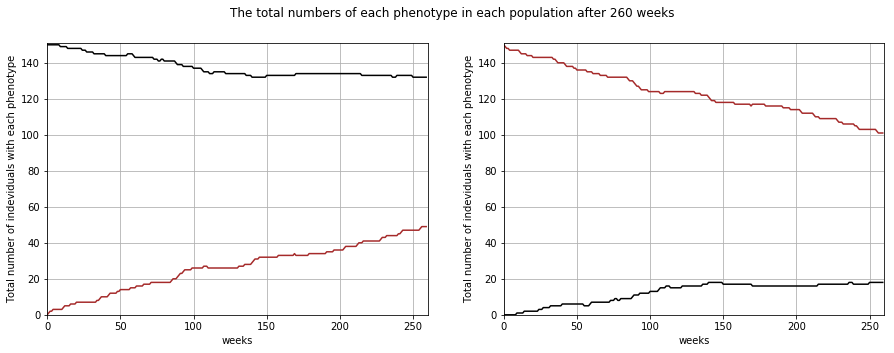

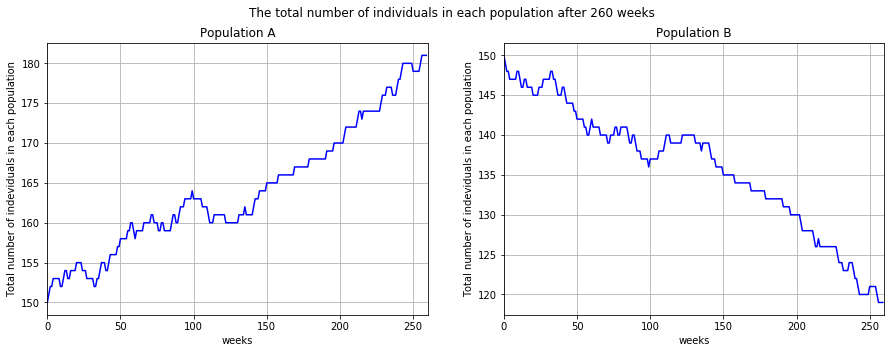

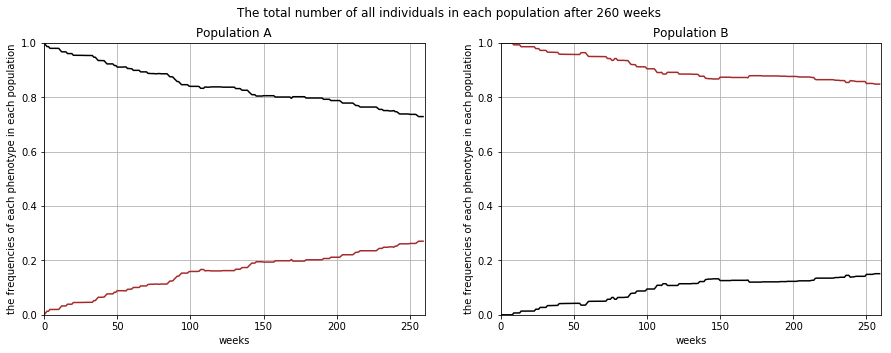

In [7]:
# the first simulation
sizePopNewA=150
sizePopNewB=150
phenoList=["brown","black"]
# For populationA, each individual have 0.9 probability to stay within the population and 0.1 probalility to migrate
A = Landscape(popID='A',sizePopNew=sizePopNewA, migration=(0.9,0.1)) 
# For populationB, each individual have 0.8 probability to stay within the population and 0.2 probalility to migrate
B = Landscape(popID='B',sizePopNew=sizePopNewB,migration=(0.8,0.2)) 
landPop=[A,B]

#Simulation for 5 years time
draw(weeks=260) 
